In [9]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 2.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.1 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.2 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.1 MB 2.8 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 2.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 2.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 2.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/8.1 MB 2.2 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 2.1 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 2.0 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 1.9 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# =========================================================
# Shahinda | Student Management System
# Python Integration with PostgreSQL
# =========================================================

import psycopg2
import pandas as pd
from tabulate import tabulate

# ======== Database Connection Config ========
DB_NAME = "student_management"
DB_USER = "postgres"
DB_PASSWORD = "shahinda"  
DB_HOST = "localhost"
DB_PORT = "5432"

# ======== Connect to Database ========
def get_connection():
    """Create and return a PostgreSQL database connection."""
    try:
        conn = psycopg2.connect(
            dbname=DB_NAME,
            user=DB_USER,
            password=DB_PASSWORD,
            host=DB_HOST,
            port=DB_PORT
        )
        print("✅ Connected to database successfully.")
        return conn
    except Exception as e:
        print("❌ Connection failed:", e)
        return None


# ======== Function to Run Query and Return DataFrame ========
def run_query(query, filename=None):
    """
    Execute SQL query, display results as table, 
    and optionally export to CSV.
    """
    conn = get_connection()
    if conn is None:
        return

    try:
        df = pd.read_sql_query(query, conn)
        print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

        # Export to CSV if filename is provided
        if filename:
            df.to_csv(filename, index=False)
            print(f"💾 Results saved to {filename}")

    except Exception as e:
        print("❌ Query failed:", e)
    finally:
        conn.close()


# ======== Example Queries ========
# 1. List all students
query_students = """
SELECT student_id, full_name, email, phone, created_at
FROM student_mgmt.students
ORDER BY student_id;
"""

# 2. Students with grade 'A'
query_grade_a = """
SELECT DISTINCT s.student_id, s.full_name, e.course_id, e.term, e.grade
FROM student_mgmt.students s
JOIN student_mgmt.enrollments e ON e.student_id = s.student_id
WHERE e.grade = 'A'
ORDER BY s.full_name, e.term;
"""

# 3. Enrollment count per course
query_course_count = """
SELECT c.course_name, COUNT(*) AS enroll_count
FROM student_mgmt.enrollments e
JOIN student_mgmt.courses c ON c.course_id = e.course_id
GROUP BY c.course_name
ORDER BY enroll_count DESC, c.course_name;
"""

# 4. Transcript View (bonus)
query_transcript = """
SELECT * FROM student_mgmt.v_transcript;
"""


# ======== Run the Queries ========
if __name__ == "__main__":
    print("\n📌 All Students:")
    run_query(query_students, "students.csv")

    print("\n📌 Students with Grade 'A':")
    run_query(query_grade_a, "grade_a.csv")

    print("\n📌 Enrollment Count per Course:")
    run_query(query_course_count, "course_counts.csv")

    print("\n📌 Transcript View:")
    run_query(query_transcript, "transcript.csv")


📌 All Students:
✅ Connected to database successfully.
+--------------+------------------+-------------------------+------------------+----------------------------+
|   student_id | full_name        | email                   | phone            | created_at                 |
|--------------+------------------+-------------------------+------------------+----------------------------|
|            1 | Shahinda Mostafa | shahinda@example.com    | +20-100-111-2222 | 2025-08-15 20:47:48.082066 |
|            2 | Omar Elbaz       | omar.elbaz@example.com  | +20-100-333-4444 | 2025-08-15 20:47:48.082066 |
|            3 | Mariam Adel      | mariam.adel@example.com | +20-100-555-6666 | 2025-08-15 20:47:48.082066 |
|            4 | Kareem Hany      | kareem.hany@example.com | +20-100-777-8888 | 2025-08-15 20:47:48.082066 |
|            5 | Salma Tarek      | salma.tarek@example.com | +20-100-999-0000 | 2025-08-15 20:47:48.082066 |
+--------------+------------------+-------------------------+----

C:\Users\Khaled\AppData\Local\Temp\ipykernel_17584\2136618668.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
C:\Users\Khaled\AppData\Local\Temp\ipykernel_17584\2136618668.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


+--------------+------------------+-------------+-------------+---------+
|   student_id | full_name        |   course_id | term        | grade   |
|--------------+------------------+-------------+-------------+---------|
|            3 | Mariam Adel      |           2 | Spring 2025 | A       |
|            2 | Omar Elbaz       |           3 | Spring 2025 | A       |
|            1 | Shahinda Mostafa |           1 | Spring 2025 | A       |
+--------------+------------------+-------------+-------------+---------+
💾 Results saved to grade_a.csv

📌 Enrollment Count per Course:
✅ Connected to database successfully.
+---------------------------+----------------+
| course_name               |   enroll_count |
|---------------------------+----------------|
| Data Analysis with Python |              3 |
| Database Systems          |              3 |
| Algorithms                |              2 |
| Business Intelligence     |              2 |
| Operating Systems         |              2 |
+----

Matplotlib is building the font cache; this may take a moment.


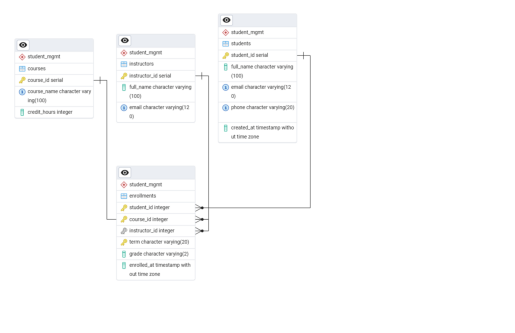

In [10]:
# --- Inline display (Notebook/Interactive) ---
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "c:/Users/Khaled/Downloads/student_management_erd" 
img = mpimg.imread(path)
plt.figure()
plt.imshow(img)
plt.axis("off")  # إخفاء المحاور
plt.show()